# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there are some cities with over 25 mph of wind.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls



In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#create a storage location
temp = []
humidity = []
cloudy = []
wind_speed = []
lat = []
lng = []
country = []
date = []
city_name = []
count = 0

print('Gathering Records:')
print('----------------------------')

for city in cities:
    response = requests.get(query_url + city).json()
    count += 1
    print(f'Processing Record {count} | For {city}')
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
    except KeyError:
          print('City not found. Skipping...')

Gathering Records:
----------------------------
Processing Record 1 | For bengkulu
City not found. Skipping...
Processing Record 2 | For miramar
Processing Record 3 | For hobart
Processing Record 4 | For lakes entrance
Processing Record 5 | For cabedelo
Processing Record 6 | For kuryk
Processing Record 7 | For lashio
Processing Record 8 | For hermanus
Processing Record 9 | For cape town
Processing Record 10 | For codrington
Processing Record 11 | For port alfred
Processing Record 12 | For puerto ayora
Processing Record 13 | For umm kaddadah
Processing Record 14 | For ushuaia
Processing Record 15 | For kapaa
Processing Record 16 | For amderma
City not found. Skipping...
Processing Record 17 | For newala
Processing Record 18 | For sao filipe
Processing Record 19 | For anlu
Processing Record 20 | For komyshuvakha
Processing Record 21 | For punta arenas
Processing Record 22 | For saintes
Processing Record 23 | For ponta do sol
Processing Record 24 | For georgetown
Processing Record 25 | Fo

Processing Record 203 | For khingansk
Processing Record 204 | For kalmunai
Processing Record 205 | For ngukurr
City not found. Skipping...
Processing Record 206 | For iacu
Processing Record 207 | For leningradskiy
Processing Record 208 | For ahuimanu
Processing Record 209 | For pevek
Processing Record 210 | For fukue
Processing Record 211 | For khanu woralaksaburi
Processing Record 212 | For esperance
Processing Record 213 | For warqla
City not found. Skipping...
Processing Record 214 | For hasaki
Processing Record 215 | For abbeville
Processing Record 216 | For xingyi
Processing Record 217 | For mbour
Processing Record 218 | For puerto carreno
Processing Record 219 | For pisco
Processing Record 220 | For oberhaching
Processing Record 221 | For buloh kasap
Processing Record 222 | For karlskrona
Processing Record 223 | For vao
Processing Record 224 | For tomatlan
Processing Record 225 | For fairbanks
Processing Record 226 | For avarua
Processing Record 227 | For vila franca do campo
Pro

Processing Record 409 | For kearney
Processing Record 410 | For black forest
Processing Record 411 | For neiafu
Processing Record 412 | For langenhagen
Processing Record 413 | For arenapolis
Processing Record 414 | For maldonado
Processing Record 415 | For kununurra
Processing Record 416 | For jiwani
Processing Record 417 | For walvis bay
Processing Record 418 | For xixiang
Processing Record 419 | For gainesville
Processing Record 420 | For bandarbeyla
Processing Record 421 | For antofagasta
Processing Record 422 | For pacific grove
Processing Record 423 | For jayanca
Processing Record 424 | For asau
City not found. Skipping...
Processing Record 425 | For southbridge
Processing Record 426 | For olinda
Processing Record 427 | For bull savanna
Processing Record 428 | For manicore
Processing Record 429 | For conceicao do araguaia
Processing Record 430 | For nikolayevka
Processing Record 431 | For kilindoni
Processing Record 432 | For chicama
Processing Record 433 | For canazas
Processing 

### Convert Raw Data to DataFrame


In [4]:
weather_data  = pd.DataFrame({'City': city_name, 'Country': country, 'Date':date,
                              'Cloudiness (%)': cloudy, 'Humidity (%)': humidity, 'Lat': lat,
                             'Lng': lng, 'Max Temp (F)': temp, 'Wind Speed (mph)': wind_speed})
weather_data.to_csv(output_data_file)

In [5]:
weather_data.head()

,City,Country,Date,Cloudiness (%),Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Miramar,CR,1554051600,0,30,10.09,-84.73,86.00,9.17
1,Hobart,AU,1554055154,20,66,-42.88,147.33,48.20,8.05
2,Lakes Entrance,AU,1554055232,48,82,-37.88,147.99,54.00,9.31
3,Cabedelo,BR,1554051600,75,94,-6.97,-34.84,80.60,4.70
4,Kuryk,KZ,1554055305,8,88,43.18,51.68,40.57,6.40


In [6]:
weather_data.dtypes

City                 object
Country              object
Date                  int64
Cloudiness (%)        int64
Humidity (%)          int64
Lat                 float64
Lng                 float64
Max Temp (F)        float64
Wind Speed (mph)    float64
dtype: object

#### Latitude vs. Temperature Plot

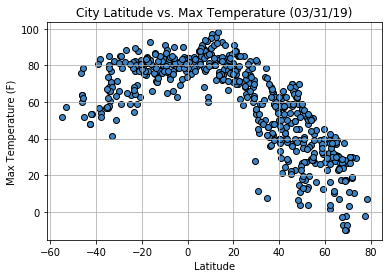

In [11]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp (F)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Max Temperature (03/31/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/latitude_vs_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

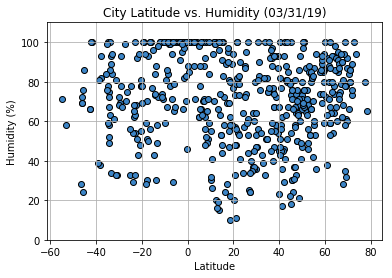

In [12]:
plt.scatter(weather_data['Lat'], weather_data['Humidity (%)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Humidity (03/31/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100+10)
plt.grid()
plt.savefig('output_data/latitude_vs_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

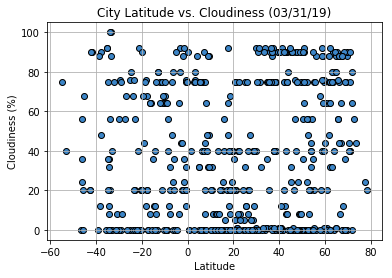

In [13]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness (%)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Cloudiness (03/31/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('output_data/latitude_vs_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

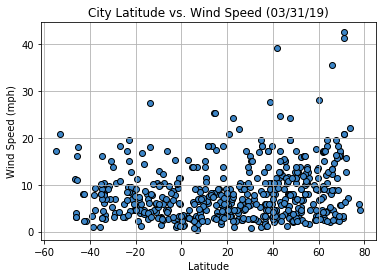

In [14]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed (mph)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Wind Speed (03/31/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/latitude_vs_windspeed.png')
plt.show()